##TASK 1: Use classification technique for prediction of Graduate Admissions from an Indian perspective

#About Classification Techniques in Machine Learning:
1. Supervised Machine Learning algorithm can be broadly classified into Regression and Classification Algorithms.

2. Therefore Classification is defined as the process of grouping objects and ideas into preset categories also called as “sub-populations.” With the help of these pre-categorized training datasets, classification in machine learning programs can be done easily.

3. Classification are done into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

4. Classification Algorithms can be further divided into the Mainly two category:

    4.1 Linear Models
      > Logistic Regression ,
      > Support Vector Machines

    4.2 Non-linear Models
      > K-Nearest Neighbours ,
      > Kernel SVM ,
      > Naïve Bayes ,
      > Decision Tree Classification ,
      > Random Forest Classification

In [2]:
# Import necessary python libraries from the module
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/Internsavy task1_Graduate_admission  - Sheet1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 9)

In [8]:
# check if there is a null value or not
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'admis_chances'})

In [11]:
df.columns

Index(['no', 'gre', 'toefl', 'rating', 'sop', 'LOR', 'gpa', 'research',
       'Chance of Admit'],
      dtype='object')

In [ ]:
df.groupby('rating').mean()

,no,gre,toefl,sop,LOR,gpa,research,Chance of Admit
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [12]:
df[df['Chance of Admit']>0.82].groupby('Chance of Admit').mean()

,no,gre,toefl,rating,sop,LOR,gpa,research
Chance of Admit,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


In [13]:
import matplotlib.pyplot as plt

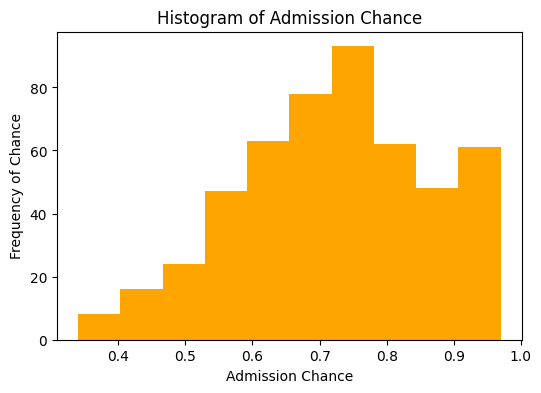

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['Chance of Admit'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

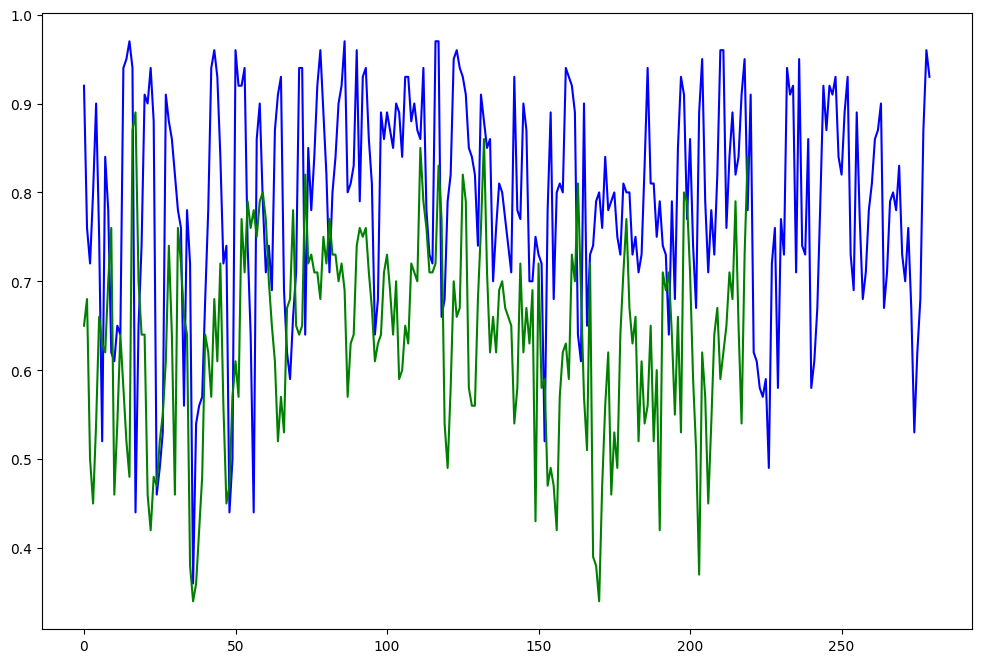

In [16]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['Chance of Admit'], color='blue')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['Chance of Admit'], color='green')
plt.show()

In [17]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [19]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

In [20]:
import numpy as np
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



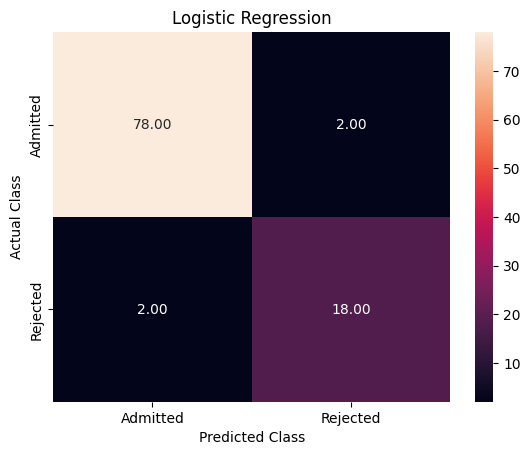

In [22]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()